In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint

file = "combined_data.xlsx"

data = pd.read_excel(file)
data.head()

,Name,short name,note,group,density g/cm3,gas-phase formation enthalpy,sublimation enthalpy,"heat of explosion (kJ/g , but note sensitivity data did not report units, and values are different?)",detonation velocity (km/s),detonation pressure (GPa),...,SMILES,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,"4-picrylamino-1,2,3-triazole",NaN,NaN,Unst. (N2 loss),1.719,382.3,185.0,5.05,7.203,22.38,...,n1n[nH]cc1Nc1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1-(3',5'-dinitrophenyl)-4-nitro-1,2,3-triazole",NaN,NaN,Unst. (N2 loss),1.701,367.0,162.0,5.27,7.131,21.79,...,n1c(cn(n1)c1cc(cc(c1)N(=O)=O)N(=O)=O)N(=O)=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1-(3',4'-dinitrophenyl)-4-nitro-1,2,3-triazole",NaN,NaN,Unst. (N2 loss),1.701,403.8,162.0,5.40,7.175,22.06,...,n1c(cn(n1)c1ccc(c(c1)N(=O)=O)N(=O)=O)N(=O)=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,6-dinitro-1-picryl-benzotriazole",NaN,NaN,Unst. (N2 loss),1.783,478.4,240.0,5.46,7.415,24.25,...,c1(c2c(cc(c1)N(=O)=O)n(nn2)c1c(cc(cc1N(=O)=O)N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1-Picryl-5,7-dinitrobenzotriazole",BTX,NaN,Unst. (N2 loss),1.783,455.3,240.0,5.41,7.396,24.13,...,c1c(cc(c2c1nnn2c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.tail()

,Name,short name,note,group,density g/cm3,gas-phase formation enthalpy,sublimation enthalpy,"heat of explosion (kJ/g , but note sensitivity data did not report units, and values are different?)",detonation velocity (km/s),detonation pressure (GPa),...,SMILES,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pro_1 = "SMILES"
pro_2 = "gas-phase formation enthalpy"
#pro_2 = "density g/cm3"

data = pd.read_excel(file, usecols = [pro_1, pro_2 ])

#data[data.isnull().any(axis=1)]

data = data.dropna()

print ("the number of data point is ", data.shape)

fp_case = 0
fp_len = 128

the number of data point is  (307, 2)


In [4]:
all_smiles = data[pro_1].values
all_y = data[pro_2].values

print ("THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:")

smiles = []
y = []
for idx in range(len(all_smiles)):
    tsmiles = all_smiles[idx]
    tmol = Chem.MolFromSmiles(tsmiles, sanitize=False)
    problems = Chem.DetectChemistryProblems(tmol)
    if (len(problems)>0):
        print (tsmiles)
    else:
        smiles.append(tsmiles)
        y.append(all_y[idx])

THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:


In [5]:
data = pd.DataFrame(list(zip(smiles, y)), columns = [pro_1, pro_2])
data['Mol'] = data[pro_1].apply(Chem.MolFromSmiles)

In [6]:
data.head()

,SMILES,gas-phase formation enthalpy,Mol
0,n1n[nH]cc1Nc1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O,382.3,<rdkit.Chem.rdchem.Mol object at 0x7f0244b55850>
1,n1c(cn(n1)c1cc(cc(c1)N(=O)=O)N(=O)=O)N(=O)=O,367.0,<rdkit.Chem.rdchem.Mol object at 0x7f0244b55a80>
2,n1c(cn(n1)c1ccc(c(c1)N(=O)=O)N(=O)=O)N(=O)=O,403.8,<rdkit.Chem.rdchem.Mol object at 0x7f0244b40490>
3,c1(c2c(cc(c1)N(=O)=O)n(nn2)c1c(cc(cc1N(=O)=O)N...,478.4,<rdkit.Chem.rdchem.Mol object at 0x7f0244b40a30>
4,c1c(cc(c2c1nnn2c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)...,455.3,<rdkit.Chem.rdchem.Mol object at 0x7f0244b40170>


In [7]:
from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

In [8]:
from sklearn.preprocessing import StandardScaler

def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)


#Scale X to unit variance and zero mean
data['Fingerprint'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case, fp_len=fp_len)

#st = StandardScaler()
#X = np.array(list(data['Fingerprint']))
#X = st.fit_transform(X)
X = np.array(list(data['Fingerprint']))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


running Random_forest


<Figure size 432x288 with 0 Axes>

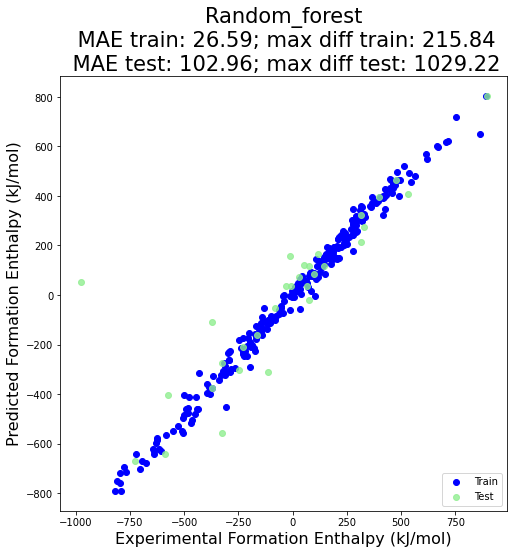

running Neural_Network


<Figure size 432x288 with 0 Axes>

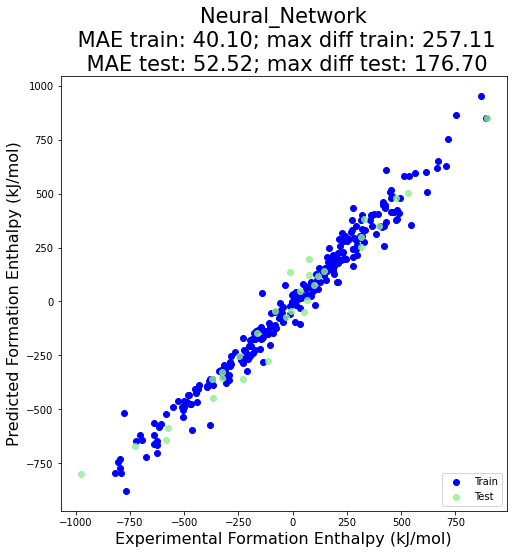

\begin{tabular}{c c c}
           name     &      MAE err   & .    abs error in CV \\ 
\hline
                Neural_Network & 52.518 & 46.592 \\
                 Random_forest & 102.962 & 75.686 \\
\end{tabular}


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.model_selection import cross_val_score

import pickle


def make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, title, figsize, fontsize, fname):    
    plt.clf()
    f = plt.figure(figsize=figsize)
    plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
    plt.title(title,fontsize=fontsize+5)
    plt.xlabel('Experimental Formation Enthalpy (kJ/mol)', fontsize=fontsize)
    plt.ylabel('Predicted Formation Enthalpy (kJ/mol)', fontsize=fontsize)
    plt.scatter(y_test,y_pred_test,c='lightgreen', label='Test', alpha = 0.8)
    plt.legend(loc=4)
    #plt.xlim(-200,500)
    #plt.ylim(-200,500)
    plt.show()
    f.savefig(fname+".pdf")

from sklearn.model_selection import train_test_split

def test_models_and_plot(x, y, model_dict, plots, fp_case, fp_len):
    ''' test a bunch of models and print out a sorted list of CV accuracies
        inputs: 
            x: training data features, numpy array or Pandas dataframe
            y: training data labels, numpy array or Pandas dataframe
            model_dict: a dictionary of the form {name : model()}, where 'name' is a string
                        and 'model()' is a scikit-learn model object. 
    '''

    mean_scores = {}
    percent_errors = {}
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    
    for (name, model) in model_dict.items():
        print("running %s" % name)
        scores = cross_val_score(model, x, y, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')
        scores = -1*scores
        mean_score = scores.mean()
        mean_scores[name] = mean_score
        
        model.fit(X_train, y_train)
        # save the model to disk
        filename = name + "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
        pickle.dump(model, open(filename, 'wb'))
        
        y_pred_train = model.predict(X_train)
        mae_train = np.mean(np.abs(y_train-y_pred_train))
        max_train = np.max(np.abs(y_train-y_pred_train))
        y_pred_test  = model.predict(X_test)
        mae_test = np.mean( np.abs(y_test -y_pred_test))
        max_test = np.max( np.abs(y_test -y_pred_test) )
        
        percent_errors[name] = mae_test

        #fulltitle = name+'\n MAE error: '+str(percent_error)
        fulltitle = name + \
            "\n MAE train: " +  str("{:.2f}".format(mae_train)) + "; max diff train: " +  str("{:.2f}".format(max_train)) + \
            "\n MAE test: " +  str("{:.2f}".format(mae_test)) + "; max diff test: " +  str("{:.2f}".format(max_test))

        if plots:
            fname = name + "_" + str(fp_case) + "_" + str(fp_len)
            make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, fulltitle, (8,8), 16, fname)

    sorted_names = sorted(percent_errors, key=mean_scores.__getitem__, reverse=False)

    print("\\begin{tabular}{c c c}")
    print("           name     &      MAE err   & .    abs error in CV \\\\ ")
    print("\\hline")
    for i in range(len(sorted_names)):
        name = sorted_names[i]
        print("%30s & %5.3f & %5.3f \\\\" % (name, percent_errors[name], mean_scores[name]))
    print("\\end{tabular}")


alpha_grid = {'alpha': np.logspace(1e-11,1e-1,8)}

model_dict = {
            #'Linear_Regression': LinearRegression(),
            #'Kernel Ridge Regression': KernelRidge(),
            #'Ridge Regression':Ridge(),
            #'Gaussian Process Regressor': GaussianProcessRegressor(normalize_y=True),
            #'Support Vector Regression': SVR(),
            #'KNeighborsRegressor': KNeighborsRegressor(),
            #'Gradient_Boosted_Trees': GradientBoostingRegressor(n_estimators=100),
            'Random_forest': RandomForestRegressor(),
            'Neural_Network': MLPRegressor(alpha=1,max_iter=8000, hidden_layer_sizes=[80,60], early_stopping=False)
            }

test_models_and_plot(X, y, model_dict, plots=True, fp_case=fp_case, fp_len=fp_len)

In [11]:
filename = "A.txt"
print("read SMILES from file:", filename)
smiles = np.loadtxt(filename, dtype=str)

import glob
import pickle

for tsmiles in smiles:
    print ("**********************************")
    print (tsmiles)
    tmol = Chem.MolFromSmiles(tsmiles)
    fp = generate_fingerprint(tmol, fp_case, fp_len)
    nlen = len(fp)
    
    X = np.array(list(fp))
    X = np.reshape(X, (1, nlen)) 
    print ("The shape of the fingerprint is", X.shape)
    
    postname = "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
    files_model = glob.glob('*'+postname)
    for f in files_model:
        model = pickle.load(open(f, 'rb'))
        y_pred = model.predict(X)
        print (f, y_pred[0])


read SMILES from file: A.txt
**********************************
CC(CO[N+]([O-])=O)(CO[N+]([O-])=O)CO[N+]([O-])=O
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav -492.89078627399203
Random_forest_0_128.sav -430.8998333333331
**********************************
C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]
The shape of the fingerprint is (1, 79)
Neural_Network_0_128.sav -363.34268671208446
Random_forest_0_128.sav -234.3490000000002
